# Pytorch regression _2.1_ [WorldHappinessReport.csv]

https://github.com/jcjohnson/pytorch-examples#pytorch-custom-nn-modules

In [1]:
import torch

I'm starting a GPU graphics card (which I don't have)

<span style="color:green"> Odpalam karte graficzną GPU (której nie mam)

In [2]:
device = torch.device('cpu') # obliczenia robie na CPU
#device = torch.device('cuda') # obliczenia robie na GPU

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/WorldHappinessReport.csv')
df.head(3)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

In [4]:
del df['Unnamed: 0'] 

In [5]:
df = df.dropna(how='any')

# df.fillna(-777, inplace=True)
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [6]:
print(df.dtypes)
df.head(3)

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


### Encodes text values

### <span style="color:green"> Koduje wartości tekstowe

In [7]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Region --- object


In [8]:
df['Country'] = pd.Categorical(df['Country']).codes
df['Country'] = df['Country'].astype(int)

In [9]:
df.dtypes

Country                            int64
Region                              int8
Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

### I specify what is X and what is y

### <span style="color:green"> Określam co jest X a co y

In [10]:
X = df.drop('Happiness Score',axis=1)
y =df['Happiness Score']

### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 0.0


In [12]:
y = y / 100  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

0.01 0.05


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [13]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[-1.7017,  0.6348,  1.6377, -1.4634, -2.1570, -1.1514, -1.1211, -0.3355,
          0.9371, -0.2564, -1.2157],
        [-1.6806, -1.3723,  0.3567, -0.1154, -0.5823,  0.9770, -0.3015, -0.6331,
         -0.7552, -0.3511, -1.2157],
        [-1.6595, -0.3688, -0.2395,  0.0309,  0.2762,  0.1606, -0.7774,  0.3545,
         -1.2461,  0.5988, -1.2157]], dtype=torch.float64)


In [14]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[-1.7017,  0.6348,  1.6377, -1.4634, -2.1570, -1.1514, -1.1211, -0.3355,
          0.9371, -0.2564, -1.2157],
        [-1.6806, -1.3723,  0.3567, -0.1154, -0.5823,  0.9770, -0.3015, -0.6331,
         -0.7552, -0.3511, -1.2157],
        [-1.6595, -0.3688, -0.2395,  0.0309,  0.2762,  0.1606, -0.7774,  0.3545,
         -1.2461,  0.5988, -1.2157]])


In [15]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [16]:
y = torch.tensor(y)
print(y[:3])

tensor([0.0358, 0.0496, 0.0561], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [17]:
y = y.view(y.shape[0],1)
y[:5]

tensor([[0.0358],
        [0.0496],
        [0.0561],
        [0.0403],
        [0.0657]], dtype=torch.float64)

In [18]:
y = y.type(torch.FloatTensor)

In [19]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([469, 11])
y: torch.Size([469, 1])


### Model

In [20]:
N, D_in = X.shape
N, D_out = y.shape

H = 30
device = torch.device('cpu')

In [21]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)


### MSE loss function
### <span style="color:green"> Funkcja straty MSE

In [22]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Define of learning

### <span style="color:green"> Definiowanie nauki

In [23]:
y_pred = model(X)
y_pred

tensor([[-4.2745e-01],
        [-3.6429e-03],
        [ 3.1600e-02],
        [-2.2681e-01],
        [-1.1513e-02],
        [-1.9216e-02],
        [-1.2311e-01],
        [-1.6105e-02],
        [ 5.4885e-02],
        [ 9.3276e-02],
        [-2.9303e-01],
        [ 1.1384e-01],
        [-4.6793e-03],
        [-3.5003e-01],
        [ 3.0583e-02],
        [-2.9466e-02],
        [-3.8709e-02],
        [-2.5406e-01],
        [-3.9137e-02],
        [ 1.5388e-01],
        [-1.7763e-01],
        [-4.0004e-01],
        [-7.0890e-02],
        [-3.0126e-01],
        [ 3.5626e-02],
        [-5.6126e-01],
        [-3.2454e-01],
        [ 6.9069e-03],
        [ 3.5522e-02],
        [-1.2959e-02],
        [-1.5253e-01],
        [-2.5984e-01],
        [-4.0041e-01],
        [-5.3569e-02],
        [-1.1350e-01],
        [ 9.3323e-03],
        [-1.2873e-02],
        [ 7.2967e-02],
        [-1.7973e-01],
        [ 4.2126e-02],
        [ 6.5027e-02],
        [-4.2669e-02],
        [ 1.8619e-02],
        [ 5

In [24]:
learning_rate = 1e-4
epochs = 2500
aggregated_losses = []

for t in range(epochs):
  
   y_pred = model(X)
            
 
   loss = loss_fn(y_pred, y) # <=# Obliczenie i wydruku straty. Mijamy Tensory zawierające przewidywane i prawdziwe
   print(t, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.
   aggregated_losses.append(loss) ## potrzebne do wykresu    
  
   model.zero_grad()    #<= # Zeruj gradienty przed uruchomieniem przejścia do tyłu. 
   

   loss.backward()      #<== Przełożenie wsteczne: oblicz gradient gradientu w odniesieniu do wszystkich możliwych do nauczenia się
                                 # parametrów modelu. Wewnętrznie parametry każdego modułu są przechowywane
                                 # w Tensorach z requires_grad=True, więc to wywołanie obliczy gradienty
                                 # wszystkich możliwych do nauczenia parametrów w modelu.
  
   with torch.no_grad():              #<== Zaktualizuj ciężary za pomocą opadania gradientu. Każdy parametr jest tensorem, więc
     for param in model.parameters():         # możemy uzyskać dostęp do jego danych i gradientów tak jak wcześniej.
       param.data -= learning_rate * param.grad

0 22.952877044677734
1 13.857816696166992
2 9.691527366638184
3 7.705139636993408
4 6.698968887329102
5 6.140297889709473
6 5.791937828063965
7 5.546450614929199
8 5.3543548583984375
9 5.19241189956665
10 5.049210548400879
11 4.918918609619141
12 4.798333168029785
13 4.685548305511475
14 4.579348087310791
15 4.478791236877441
16 4.383253574371338
17 4.292238235473633
18 4.205319881439209
19 4.122212886810303
20 4.042584419250488
21 3.9661753177642822
22 3.8927762508392334
23 3.8221662044525146
24 3.754176616668701
25 3.6886744499206543
26 3.625523567199707
27 3.5645980834960938
28 3.505775213241577
29 3.4489235877990723
30 3.393965482711792
31 3.340808868408203
32 3.2893426418304443
33 3.2395153045654297
34 3.191263198852539
35 3.1444873809814453
36 3.099121332168579
37 3.0551016330718994
38 3.0123729705810547
39 2.970889091491699
40 2.9305853843688965
41 2.8914124965667725
42 2.8533215522766113
43 2.8162498474121094
44 2.7801461219787598
45 2.7450110912323
46 2.7107717990875244
47 2.6

<function matplotlib.pyplot.show(*args, **kw)>

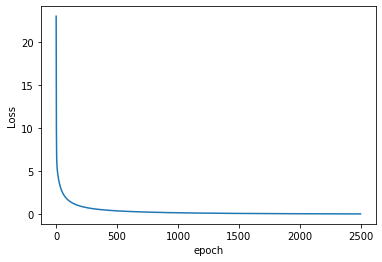

In [51]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.show

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 
    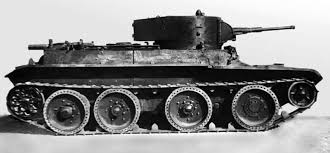

In [26]:
with torch.no_grad():
    y_pred = model(X)  
    loss = (y_pred - y).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.04672889


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [27]:
y_pred[:5]

tensor([[0.0297],
        [0.0404],
        [0.0731],
        [0.0552],
        [0.0586]])

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [28]:
torch.save(model,'/home/wojciech/Pulpit/7/byk12.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model

In [29]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk12.pb')
KOT.eval()

Sequential(
  (0): Linear(in_features=11, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

In [30]:
X_exp = X[85] 
X_exp

tensor([ 0.1112,  0.9693,  1.1518, -2.1961, -1.8163, -1.4758,  0.1856, -0.5823,
         0.6798,  1.2684, -1.2157])

In [31]:
y_exp = y[85]
y_exp

tensor([0.0429])

In [32]:
y_pred_exp = model(X_exp)
y_pred_exp

tensor([0.0459], grad_fn=<AddBackward0>)

In [33]:
y_pred*100

tensor([[2.9664],
        [4.0416],
        [7.3108],
        [5.5216],
        [5.8579],
        [4.8767],
        [5.6226],
        [5.9540],
        [6.6332],
        [8.8765],
        [2.3783],
        [7.1672],
        [6.3292],
        [3.3638],
        [5.9914],
        [6.0794],
        [5.7204],
        [2.7975],
        [6.6604],
        [4.9272],
        [4.8879],
        [2.9091],
        [5.4933],
        [2.5811],
        [7.4032],
        [5.1133],
        [4.7074],
        [5.6793],
        [4.5719],
        [5.7311],
        [3.2888],
        [2.8930],
        [5.0066],
        [6.1134],
        [3.6609],
        [5.4406],
        [5.9087],
        [7.8294],
        [3.7849],
        [5.3835],
        [6.4967],
        [5.9825],
        [6.5347],
        [5.6162],
        [3.9004],
        [7.9095],
        [6.4070],
        [3.0974],
        [3.9098],
        [6.2177],
        [4.9921],
        [4.4564],
        [5.3692],
        [3.4037],
        [6.1061],
        [6

In [34]:
df.loc[85,'Happiness Score']

5.007

In [35]:
(y_exp - y_pred_exp).pow(2).sum()

tensor(8.7851e-06, grad_fn=<SumBackward0>)

### r2_score_compute
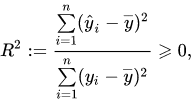

In [36]:
def r2_score_compute_fn(y_pred, y):
    e = torch.sum((y_pred-y.mean()) ** 2) / torch.sum((y - y.mean()) ** 2)
    return 1 - e.item()


In [37]:
r2_score_compute_fn(y, y_pred)

0.4201156497001648

In [46]:
a = pd.DataFrame(y)
b = pd.DataFrame(y_pred)